# Project Naive Bayes - Text Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as pyt 
from string import punctuation
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support 

In [2]:
stop_word =["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

In [3]:
print(len(stop_word))

323


In [4]:
special_character_number = set(stopwords.words("english"))
#these are the stopwords which we don't want to include in out vocabulary.
punctuation = set(punctuation)
#punctuation marks also should be removed from our vocabulary.
for i in range(10):
    special_character_number.add(str(i))
#add number from 0 to 9 in punctuation.
special_character_number.update(punctuation)
#i have created a set of stop words and updated it with all the punctuation marks and number


In [5]:
print(special_character_number)

{'weren', 'didn', 'their', 'myself', '/', 'only', 'down', 'those', '~', 'was', 'of', 'if', "shan't", 'he', 'doesn', 'your', 'we', "you'll", 'few', 'this', 'it', '>', 'about', 'ma', 'which', 'been', 'isn', "shouldn't", 'that', '.', 'nor', 'being', 'is', "wasn't", '<', ';', 'mustn', 'did', "don't", 'd', 'in', 're', "weren't", 'because', 'wouldn', '=', 'themselves', '+', '-', 'her', 'own', 'ourselves', '\\', 'can', 'from', 'so', 'below', 'how', '6', '2', 'just', 'there', 'at', 'no', '!', '*', 'she', '^', 'theirs', "should've", ')', 'each', 'wasn', '@', '}', ']', 'an', 'the', 'should', "isn't", 'will', 'a', 'than', '%', 'himself', '#', 'his', 'y', 'or', 'with', 'again', "haven't", 'here', 'once', '(', "it's", 'll', 'them', 'am', 'itself', 'whom', '5', '1', 'who', 'as', 'under', 'through', 'hadn', 'has', 'to', 'won', '&', 'over', 'mightn', 'while', "you'd", 'up', '9', 'why', 'don', '"', 'what', 'do', 't', 'yours', 'off', 'and', 'some', 'such', 'these', 'o', "mightn't", 'doing', 'have', 'bet

In [6]:
all_stop_words = set(stop_word)
all_stop_words.update(special_character_number)

In [7]:
print(len(all_stop_words))

422


In [8]:
print(all_stop_words)

{'/', 'five', 'alone', 'towards', 'whereby', 'he', 'nowhere', 'whereafter', 'beyond', 'about', 'fifteen', 'isn', '.', 'almost', "wasn't", '<', 'mustn', 'whether', "weren't", 'because', '-', 'someone', 'thereafter', 'ourselves', 'can', 'how', 'nobody', 'forty', 'at', 'no', 'namely', 'each', 'wasn', '@', 'system', 'a', '#', 'last', 'whose', 'found', 'here', 'am', 'co', '1', 'as', 'under', 'has', 'twenty', 'seem', 'to', 'while', "you'd", 'first', 'don', 'do', 'show', 'some', 'these', 'also', 'o', 'third', 'anyone', 'doing', 'by', 'fire', 'amount', 'became', "won't", 'other', 'most', 'mostly', "didn't", 'very', 'always', 'becomes', 'until', 'all', 'back', 'for', '8', "mustn't", 'three', 'ltd', 'beside', 'ours', 'others', 'next', 'our', 's', 'but', 'still', ':', 'meanwhile', 'four', 'one', '|', 'both', "needn't", 'therein', 'toward', 'latter', 'their', 'becoming', 'six', 'etc', 'only', 'those', 'though', 'if', "shan't", 'your', 'seemed', 'along', 'this', 'somewhere', 'which', 'done', 'amoun

In [9]:
X = []
# X contains all the documents of all category.
Y = []
#Y contain all the category.
file = os.listdir('C:\\Users\\hp\\Desktop\\20_newsgroups/')
for category in file:
    all_document = os.listdir('C:\\Users\\hp\\Desktop\\20_newsgroups/'+category)
    for document in all_document:
        with open('C:\\Users\\hp\\Desktop\\20_newsgroups/'+category+'/'+document, "r") as f:
            X.append(f.read())
            Y.append(category)

In [10]:
X_new = [word_tokenize(word) for word in X]
#i have modified the X to a form in which we have list of list of words(tokenized data for each document)

In [11]:
# split these document in to train test split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,random_state=1)

In [12]:
len(X_train),len(X_test)

(14997, 5000)

In [13]:
all_words = {}
#this variable is going to contain all the words from all our documents with frequency.
for word_list in X_train:
    for word in word_list:
        if (word.lower() not in all_stop_words) and (len(word)>2) and (word[0]!="'") and (word!="n't") and (word[0]!="."):
            all_words[word] = all_words.get(word,0)+1

In [14]:
#now i have sorted all_words dictionary in descending order.
final_dict = dict(sorted(all_words.items(), key=lambda kv:(kv[1], kv[0]),reverse= True))

In [15]:
len(final_dict)

266187

<h1>Frequency Distribution of words</h1>

In [16]:
freq = list(final_dict.values())
word_name = list(final_dict.keys())

In [17]:
len(freq)

266187

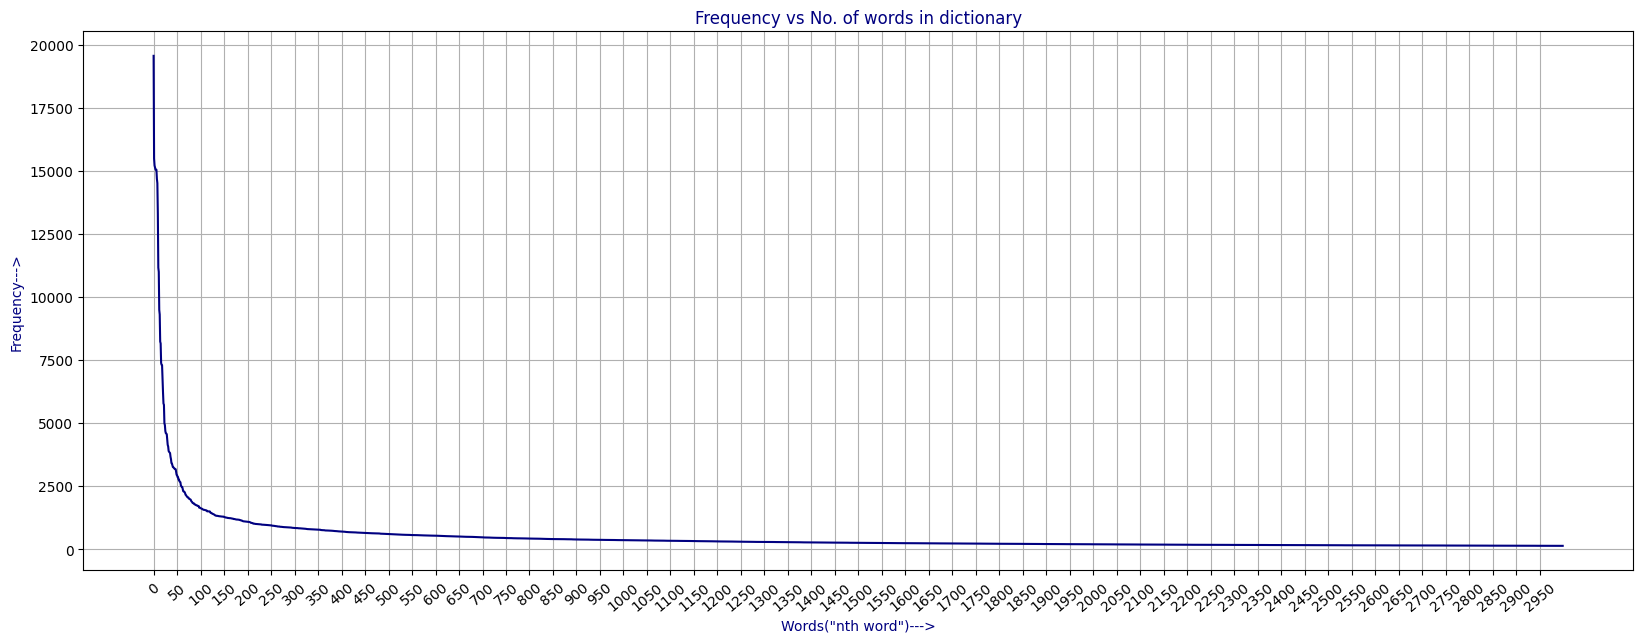

In [18]:
# Plotting a graph of no of words with a given frequency to decide cutoff frequency
n_word = np.arange(len(word_name)) 
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
plt.plot(n_word[0:3000],freq[0:3000],color = 'navy')
plt.xlabel('Words("nth word")--->',color = 'navy')
plt.ylabel("Frequency--->",color = 'navy')
plt.title('Frequency vs No. of words in dictionary',color = 'navy')
#adjusting the xticks
plt.xticks(np.arange(0, 3000, 50), rotation=40)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [19]:
# picking the top 10000 words for vocabulary
final_features = word_name[20:10000]
final_freq = freq[20:10000]


In [20]:
freq[20],freq[9999]

(6219, 32)

In [21]:
print((final_features)[0])

zaphod.mps.ohio-state.edu


In [22]:
def data_modifier(X_data,final_features):
    modified_data = np.zeros((len(X_data),len(final_features)))
 
    #Ignore this "Count" variable. i have created it just to keep an eye on the progress of our algorithm.
    max_count = len(X_data)
    count = 0
    for i in range(len(X_data)):
        #looping over each and every row in the x_data
        current_doc = X_data[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        d = {}
        #this dictionary contains the frequency of all the elements in our current_doc.
        for word in current_doc:
            d[word] = d.get(word,0)+1
        #dictionary created

        for j in range(len(final_features)):
            #now for each feature in final features we will insert the value of the dictionary for the corresponding. that is, 
            #the frequency of each feature in that current document.
            current_feature = final_features[j]
            if current_feature in d:
                modified_data[i][j] = d[current_feature]

            else:
                #if the current feature is not in the dictionary, it will remain 0 in the modified_data 2D matrix
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")
        #This statement just prints the progress of our data_modifier function.
    #finally I have returned the modified array.
    return modified_data 

In [23]:
x_train_dataset = data_modifier(X_train, final_features)
#training and testing data has to be modified saparately because we cant use the testing data for training purpose
#as both the Training and testing data must be having their own separate vocabularies.

progress:  0.006668000266720011 %
progress:  0.013336000533440022 %
progress:  0.020004000800160033 %
progress:  0.026672001066880044 %
progress:  0.03334000133360005 %
progress:  0.040008001600320066 %
progress:  0.04667600186704007 %
progress:  0.05334400213376009 %
progress:  0.060012002400480095 %
progress:  0.0666800026672001 %
progress:  0.07334800293392012 %
progress:  0.08001600320064013 %
progress:  0.08668400346736013 %
progress:  0.09335200373408015 %
progress:  0.10002000400080016 %
progress:  0.10668800426752018 %
progress:  0.11335600453424018 %
progress:  0.12002400480096019 %
progress:  0.1266920050676802 %
progress:  0.1333600053344002 %
progress:  0.14002800560112022 %
progress:  0.14669600586784023 %
progress:  0.15336400613456025 %
progress:  0.16003200640128026 %
progress:  0.16670000666800028 %
progress:  0.17336800693472026 %
progress:  0.18003600720144028 %
progress:  0.1867040074681603 %
progress:  0.1933720077348803 %
progress:  0.20004000800160032 %
progress:

In [24]:
print(len(X_test))

5000


In [25]:
x_test_dataset = data_modifier(X_test, final_features)
#training and testing data has to be modified saparately because we cant use the testing data for training purpose
#as both the Training and testing data must be having their own separate vocabularies.

progress:  0.02 %
progress:  0.04 %
progress:  0.06 %
progress:  0.08 %
progress:  0.1 %
progress:  0.12 %
progress:  0.14 %
progress:  0.16 %
progress:  0.18 %
progress:  0.2 %
progress:  0.22 %
progress:  0.24 %
progress:  0.26 %
progress:  0.28 %
progress:  0.3 %
progress:  0.32 %
progress:  0.34 %
progress:  0.36 %
progress:  0.38 %
progress:  0.4 %
progress:  0.42 %
progress:  0.44 %
progress:  0.46 %
progress:  0.48 %
progress:  0.5 %
progress:  0.52 %
progress:  0.54 %
progress:  0.56 %
progress:  0.58 %
progress:  0.6 %
progress:  0.62 %
progress:  0.64 %
progress:  0.66 %
progress:  0.68 %
progress:  0.7 %
progress:  0.72 %
progress:  0.74 %
progress:  0.76 %
progress:  0.78 %
progress:  0.8 %
progress:  0.82 %
progress:  0.84 %
progress:  0.86 %
progress:  0.88 %
progress:  0.9 %
progress:  0.92 %
progress:  0.94 %
progress:  0.96 %
progress:  0.98 %
progress:  1.0 %
progress:  1.02 %
progress:  1.04 %
progress:  1.06 %
progress:  1.08 %
progress:  1.1 %
progress:  1.12 %
pro

<h1>Trying out the inbuilt Multinomial Naive Bayes classifier</h1>

In [104]:
# using sklearn multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(x_train_dataset,Y_train)
y_pred = clf.predict(x_test_dataset)
sklearn_score_train = clf.score(x_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test_inbuilt = clf.score(x_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test_inbuilt)
print("Classification report for testing data :-")
print(classification_report(Y_test, y_pred))

Sklearn's score on training data : 0.9396545975861839
Sklearn's score on testing data : 0.895
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.85      0.82       261
           comp.graphics       0.78      0.89      0.83       248
 comp.os.ms-windows.misc       0.94      0.77      0.85       253
comp.sys.ibm.pc.hardware       0.80      0.83      0.82       260
   comp.sys.mac.hardware       0.89      0.94      0.91       266
          comp.windows.x       0.93      0.89      0.91       265
            misc.forsale       0.86      0.88      0.87       252
               rec.autos       0.92      0.92      0.92       223
         rec.motorcycles       0.97      0.98      0.97       293
      rec.sport.baseball       0.98      0.96      0.97       245
        rec.sport.hockey       0.99      0.96      0.98       247
               sci.crypt       0.97      0.96      0.96       248
     

<h1>Writing our own Naive Bayes Classifier</h1>

In [95]:
def fit1(X_train,Y_train):
    result = {}
    class_vlaue = set(Y_train)
    result["total_data"] = 0
    for current_class in class_vlaue:
        result[current_class] = {}
        
        current_class_row = (Y_train == current_class)
        X_train_current = X_train[current_class_row]
        num_features = X_train.shape[1]
        result[current_class]["total_count"] = 0
        for j in range(num_features):
            result[current_class][j] = X_train_current[:,j].sum()
            result[current_class]["total_count"]  += result[current_class][j]
        result["total_data"] += result[current_class]["total_count"] 
    return result

In [96]:
def Probability(dictionary,x,current_class):
    
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    output = 0
    num_features = len(x)
    for i in range(num_features):
        if x[i] != 0:
            count_current_class_i  = dictionary[current_class][i]+1
            count_current_class = dictionary[current_class]["total_count"]+num_features
            current_probability = x[i]*(np.log(count_current_class_i)- np.log(count_current_class))
            output += current_probability
    return output

In [97]:
def PredictsinglePoint(dictionary,x):
    classes = dictionary.keys()
    best_p = -10000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class == "total_data"):
            continue
        p_current_class = Probability(dictionary,x,current_class)
        if first_run or p_current_class > best_p:
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class


In [98]:
def Predict1(dictionary,X_test):
    y_pred1 = []
    for x in X_test:
        x_class = PredictsinglePoint(dictionary,x)
        y_pred1.append(x_class)
    return y_pred1

In [99]:
    def score1(y_pred1,y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(y_pred1)):
            if y_pred1[i] == y_true[i]:
                count+=1
        return count/len(y_pred1)

In [100]:

clf1 = fit1(x_train_dataset,np.array(Y_train))
y_pred_imple = Predict1(clf1,x_test_dataset)

In [105]:
sklearn_score_testing_our_function = score1(y_pred_imple,Y_test)
print("Sklearn's score on testing data :",sklearn_score_testing_our_function)
print("Classification report for testing data :-")
print(classification_report(Y_test, y_pred_imple))
print(confusion_matrix(Y_test,y_pred_imple))

Sklearn's score on testing data : 0.8948
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.85      0.82       261
           comp.graphics       0.78      0.89      0.83       248
 comp.os.ms-windows.misc       0.94      0.77      0.85       253
comp.sys.ibm.pc.hardware       0.80      0.83      0.82       260
   comp.sys.mac.hardware       0.89      0.94      0.91       266
          comp.windows.x       0.93      0.89      0.91       265
            misc.forsale       0.86      0.88      0.87       252
               rec.autos       0.92      0.92      0.92       223
         rec.motorcycles       0.97      0.98      0.97       293
      rec.sport.baseball       0.98      0.96      0.97       245
        rec.sport.hockey       0.99      0.96      0.98       247
               sci.crypt       0.97      0.96      0.96       248
         sci.electronics       0.87      0.92      0.89   

# Comparison.

In [106]:
print("Score of our algorithm on test data:",sklearn_score_testing_our_function)
print("Score of sklearn's MultinomialNB on the same data :",sklearn_score_test_inbuilt)

Score of our algorithm on test data: 0.8948
Score of sklearn's MultinomialNB on the same data : 0.895
